#Gestión de datos con Pandas

En el campo de Ciencia de datos se debe definir un ciclo de gestión de los datos que cubra:

**1.Gestión de los datos**

   *  Carga de datos
   *  Curación de datos
   * Enriquecimiento de datos
   * Consolidación

2. Análisis preliminar de los datos (incluyendo visualización)
3. Análisis de datos 
4. Visualización 
5. Aplicación


Para esta primer punto la biblioteca [Pandas](https://pandas.pydata.org/) de Python se ha convertido en un referente ya que, esencialmente, permite disponer de un** sistema de Hoja de Cálculo como funciones de un lenguaje de programación**. Además, tiene otras características referentes al **análisis de datos**, **visualización** (integración con Matplotlib), etc.

Para ejemplificar su uso, se podrán utilizar 3 conjuntos de datos:

* Un volcado de datos de información de IMDB (películas).
* Un volcado de datos de caracter numérico, Nomenclator de Asturias (entidades de población y demografía).
* Un vocaldo de datos de meetups en Houston.

Para incluir Pandas en nuestro proyecto de Python se importan los siguientes módulos.

In [0]:
import pandas as pd
import numpy as np

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Fundamentos de Pandas:  Data Frame

* Se puede incluir una forma para el conjunto de datos.

In [0]:
#pd.set_option('max_columns', x, 'max_rows', y)

* Carga de datos. 
* Se pueden leer datos desde diferentes fuentes y formatos: https://pandas.pydata.org/pandas-docs/stable/reference/io.html

In [0]:
movies = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/movies.csv")
movies.head()

* Se puede ver la estructura de nuestros datos

In [0]:

columns = movies.columns
index = movies.index
data = movies.values
#Información del data frame
movies.info()
print (columns)
print (index)
print (data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [0]:
#Se pueden ver los tipos de nuestras columnas
movies.dtypes
movies.get_dtype_counts()

float64    13
int64       3
object     12
dtype: int64

In [0]:
#Se pueden proyectar columnas en forma de diccionario o bien indicando directamente el nombre de la columna. 
movies['director_name']
movies.director_name

0            James Cameron
1           Gore Verbinski
2               Sam Mendes
3        Christopher Nolan
4              Doug Walker
5           Andrew Stanton
6                Sam Raimi
7             Nathan Greno
8              Joss Whedon
9              David Yates
10             Zack Snyder
11            Bryan Singer
12            Marc Forster
13          Gore Verbinski
14          Gore Verbinski
15             Zack Snyder
16          Andrew Adamson
17             Joss Whedon
18            Rob Marshall
19        Barry Sonnenfeld
20           Peter Jackson
21               Marc Webb
22            Ridley Scott
23           Peter Jackson
24             Chris Weitz
25           Peter Jackson
26           James Cameron
27           Anthony Russo
28              Peter Berg
29         Colin Trevorrow
               ...        
5013            Eric Eason
5014              Uwe Boll
5015     Richard Linklater
5016       Joseph Mazzella
5017          Travis Legge
5018         Alex Kendrick
5

In [0]:
#Se puede asociar los datos proyectados a una variable (ej: series)
director = movies['director_name'] # save Series to variable
print (type(director))

<class 'pandas.core.series.Series'>


In [0]:
#La nueva variable se puede gestionar como un nuevo dataframe en pandas.
director_df = director.to_frame().head()
director_df.info()
director_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 1 columns):
director_name    5 non-null object
dtypes: object(1)
memory usage: 120.0+ bytes


,director_name
0,James Cameron
1,Gore Verbinski
2,Sam Mendes
3,Christopher Nolan
4,Doug Walker


In [0]:
#Algunas operaciones básicas:
imdb_scores_df = movies.imdb_score   
len(imdb_scores_df)
#Estadística descriptiva básica
print("Count: "+str(imdb_scores_df.count()))
print("Quantile: "+str(imdb_scores_df.quantile()))
print("Min: "+str(imdb_scores_df.min()))
print("Max: "+str(imdb_scores_df.max()))
print("Mean: "+str(imdb_scores_df.mean()))
print("Median: "+str(imdb_scores_df.median()))
print("Std: "+str(imdb_scores_df.std()))
print("Sum: "+str(imdb_scores_df.sum()))

Count: 5043
Quantile: 6.6
Min: 1.6
Max: 9.5
Mean: 6.442137616498111
Median: 6.6
Std: 1.1251158657328104
Sum: 32487.7


In [0]:
imdb_scores_df.describe()
imdb_scores_df.quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])

0.1    5.0
0.2    5.6
0.3    6.0
0.4    6.3
0.5    6.6
0.6    6.8
0.7    7.1
0.8    7.4
0.9    7.8
Name: imdb_score, dtype: float64

In [0]:
#Chequeos en los datos
director.isnull()
director.hasnans
director.notnull()

In [0]:
#Rellenar los datos
imdb_scores_df_filled = imdb_scores_df.fillna(0)
print(str(imdb_scores_df_filled.count()))
#Borrar datos
imdb_scores_df_dropped = imdb_scores_df.dropna()
print(str(imdb_scores_df_dropped.count()))

5043
5043


In [0]:
#Normalización
imdb_scores_df.value_counts(normalize=True)

6.7    0.044220
6.6    0.039857
7.2    0.038667
6.5    0.036883
6.4    0.036685
7.3    0.036486
7.0    0.036486
7.1    0.035891
6.8    0.035891
6.1    0.035495
6.3    0.034900
6.2    0.034702
6.9    0.034503
7.4    0.029149
5.9    0.028554
7.5    0.027761
6.0    0.025977
7.6    0.024589
5.8    0.024589
5.7    0.023200
7.7    0.022606
5.6    0.022209
7.8    0.021019
5.4    0.020623
5.5    0.019433
5.3    0.018243
8.0    0.014872
7.9    0.014872
5.1    0.014079
8.1    0.013682
         ...   
3.5    0.002974
3.9    0.002776
3.8    0.002776
3.6    0.002776
8.7    0.002578
3.4    0.002380
2.8    0.001785
3.7    0.001785
3.1    0.001586
8.8    0.001388
3.2    0.001388
2.7    0.001190
3.0    0.000991
8.9    0.000991
2.9    0.000793
2.2    0.000595
2.1    0.000595
1.9    0.000595
9.0    0.000595
9.1    0.000595
2.3    0.000595
2.5    0.000397
2.0    0.000397
2.4    0.000397
2.6    0.000397
9.3    0.000198
1.7    0.000198
9.5    0.000198
9.2    0.000198
1.6    0.000198
Name: imdb_score, Length

In [0]:
print(len(movies.columns))
#for j in range(0,len(movies.columns)):        
#        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

#Chequear cuántos valores nulos hay por columna
movies.isnull().sum()

##Operaciones con el DataFrame

In [0]:
#Crear index (fila sobre la que pivotan los datos)
movies_i = movies.set_index('movie_title')
movies_i
#Reset index
movies_i.reset_index()

In [0]:
#Renombrar columnas e índices
idx_rename = {'movie_title':'Title'} 
col_rename = {'director_name':'Director Name', 
              'num_critic_for_reviews': 'Critical Reviews'} 

movies.rename(index=idx_rename,columns=col_rename).head()

In [0]:
#Listado de columnas e índices
index_list =  movies.index.tolist()
column_list =  movies.columns.tolist()
print(index_list)
print(column_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [0]:
#Crear una nueva columna
movies['my_score'] = 0
movies.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'my_score'],
      dtype='object')

In [0]:
movies['actor_director_facebook_likes'] = (movies['actor_1_facebook_likes'] + 
                                              movies['actor_2_facebook_likes'] + 
                                              movies['actor_3_facebook_likes'] + 
                                              movies['director_facebook_likes'])
movies['actor_director_facebook_likes'].isnull().sum()

124

In [0]:
movies['actor_director_facebook_likes'] = movies['actor_director_facebook_likes'].fillna(0)

In [0]:
#Borrar columnas
movies = movies.drop('actor_director_facebook_likes', axis='columns')
movies.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'my_score'],
      dtype='object')

##Análisis de datos básico

In [0]:
movies.shape

(5043, 29)

In [0]:
from IPython.display import display

display(movies.describe(include=[np.number]).T)

In [0]:
movies.describe(include=[np.object, pd.Categorical]).T

,count,unique,top,freq
color,5024,2,Color,4815
director_name,4939,2398,Steven Spielberg,26
actor_2_name,5030,3032,Morgan Freeman,20
genres,5043,914,Drama,236
actor_1_name,5036,2097,Robert De Niro,49
movie_title,5043,4917,Pan,3
actor_3_name,5020,3521,Steve Coogan,8
plot_keywords,4890,4760,based on novel,4
movie_imdb_link,5043,4919,http://www.imdb.com/title/tt2638144/?ref_=fn_t...,3
language,5031,47,English,4704


In [0]:
display(movies.describe(include=[np.number], percentiles=[.01, .05, .10, .25, .5, .75, .9, .95, .99]).T)

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
num_critic_for_reviews,4993.0,1.401943e+02,1.216017e+02,1.00,2.00,9.00,17.20,50.00,110.00,195.00,2.998000e+02,3.870000e+02,5.480800e+02,8.130000e+02
duration,5028.0,1.072011e+02,2.519744e+01,7.00,43.00,81.00,86.00,93.00,103.00,118.00,1.340000e+02,1.460000e+02,1.890000e+02,5.110000e+02
director_facebook_likes,4939.0,6.865092e+02,2.813329e+03,0.00,0.00,0.00,0.00,7.00,49.00,194.50,5.450000e+02,9.730000e+02,1.600000e+04,2.300000e+04
actor_3_facebook_likes,5020.0,6.450098e+02,1.665042e+03,0.00,0.00,10.00,34.00,133.00,371.50,636.00,8.970000e+02,1.000000e+03,1.100000e+04,2.300000e+04
actor_1_facebook_likes,5036.0,6.560047e+03,1.502076e+04,0.00,7.00,95.50,248.50,614.00,988.00,11000.00,1.850000e+04,2.400000e+04,4.400000e+04,6.400000e+05
gross,4159.0,4.846841e+07,6.845299e+07,162.00,8497.80,99034.00,382601.80,5340987.50,25517500.00,62309437.50,1.250252e+08,1.800297e+08,3.335736e+08,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,54.26,514.60,1643.40,8593.50,34359.00,96309.00,2.165620e+05,3.322549e+05,6.810943e+05,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,6.42,179.00,525.20,1411.00,3090.00,13756.50,2.591440e+04,3.692770e+04,6.302724e+04,6.567300e+05
facenumber_in_poster,5030.0,1.371173e+00,2.013576e+00,0.00,0.00,0.00,0.00,0.00,1.00,2.00,4.000000e+00,5.000000e+00,8.000000e+00,4.300000e+01
num_user_for_reviews,5022.0,2.727708e+02,3.779829e+02,1.00,1.21,10.00,21.10,65.00,156.00,326.00,6.300000e+02,9.078000e+02,2.010110e+03,5.060000e+03


In [0]:
movies.memory_usage(deep=True)


Index                            80
color                        314395
director_name                352261
num_critic_for_reviews        40344
duration                      40344
director_facebook_likes       40344
actor_3_facebook_likes        40344
actor_2_name                 355602
actor_1_facebook_likes        40344
gross                         40344
genres                       389890
actor_1_name                 355513
movie_title                  491943
num_voted_users               40344
cast_total_facebook_likes     40344
actor_3_name                 355549
facenumber_in_poster          40344
plot_keywords                540024
movie_imdb_link              549687
num_user_for_reviews          40344
language                     322271
country                      304905
content_rating               311198
budget                        40344
title_year                    40344
actor_2_facebook_likes        40344
imdb_score                    40344
aspect_ratio                

In [0]:
movies.describe(include=[np.int64, np.float64]).T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,1.401943e+02,1.216017e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,5028.0,1.072011e+02,2.519744e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4939.0,6.865092e+02,2.813329e+03,0.00,7.00,49.00,194.50,2.300000e+04
actor_3_facebook_likes,5020.0,6.450098e+02,1.665042e+03,0.00,133.00,371.50,636.00,2.300000e+04
actor_1_facebook_likes,5036.0,6.560047e+03,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
gross,4159.0,4.846841e+07,6.845299e+07,162.00,5340987.50,25517500.00,62309437.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5030.0,1.371173e+00,2.013576e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5022.0,2.727708e+02,3.779829e+02,1.00,65.00,156.00,326.00,5.060000e+03


In [0]:
#Selección de varias columnas.
movies_2 = movies[['movie_title', 'imdb_score', 'budget']]
movies_2.nlargest(100, 'imdb_score').head()

,movie_title,imdb_score,budget
2765,Towering Inferno,9.5,NaN
1937,The Shawshank Redemption,9.3,25000000.0
3466,The Godfather,9.2,6000000.0
2824,Dekalog,9.1,NaN
3207,Dekalog,9.1,NaN


In [0]:
#De los 100 IMDB scores más grandes, seleccionar los 5 más pequeños en presupuesto.
movies_2.nlargest(100, 'imdb_score').nsmallest(5, 'budget')

,movie_title,imdb_score,budget
4924,Butterfly Girl,8.7,180000.0
4921,Children of Heaven,8.5,180000.0
4822,12 Angry Men,8.9,350000.0
4659,A Separation,8.4,500000.0
2242,Psycho,8.5,806947.0


In [0]:
#Ordenar los valores por el IMDB score y mostrar la cabecera.
movies_2.sort_values('imdb_score', ascending=False)

In [0]:
#Por presupuesto, borrar los duplicados.
movie_top_year = movies_2.drop_duplicates(subset='budget')
movie_top_year.head()

##Selección de datos

In [0]:
#Seleccionar una columna de datos.
titles = movies['movie_title']
titles.head()


0                                              Avatar 
1            Pirates of the Caribbean: At World's End 
2                                             Spectre 
3                               The Dark Knight Rises 
4    Star Wars: Episode VII - The Force Awakens    ...
Name: movie_title, dtype: object

In [0]:
#Seleccionar la fila 2.
titles.iloc[2]

'Spectre\xa0'

In [0]:
#Seleccionar celdas desde la 4 hasta la 50 de 10 en 10.
titles.iloc[4:50:10]

4     Star Wars: Episode VII - The Force Awakens    ...
14                                     The Lone Ranger 
24                                  The Golden Compass 
34                               X-Men: The Last Stand 
44                                Terminator Salvation 
Name: movie_title, dtype: object

In [0]:
#Seleccionar 4 títulos aleatoriamente
np.random.seed(1)
labels = list(np.random.choice(titles.index, 4))
labels

[235, 3980, 905, 2763]

In [0]:
#Visualizar esos títulos.
titles.loc[labels]

235             Oblivion 
3980    The History Boys 
905           Black Mass 
2763    Fatal Attraction 
Name: movie_title, dtype: object

In [0]:
titles.loc['Fa':'At']

Series([], Name: movie_title, dtype: object)

##Indexado

In [0]:
#Selección de columnas

columns = movies.columns
columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [0]:
columns.values

array(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres',
       'actor_1_name', 'movie_title', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes'], dtype=object)

In [0]:
columns[1]

'director_name'

In [0]:
columns.min(), columns.max(), columns.isnull().sum()

('actor_1_facebook_likes', 'title_year', 0)

In [0]:
#Selección de las primeras k columnas

c1 = columns[:4]
c1

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration'], dtype='object')

In [0]:
#Producto cartesiano

s1 = pd.Series(index=list('aaab'), data=np.arange(4))
s1

a    0
a    1
a    2
b    3
dtype: int64

In [0]:
s2 = pd.Series(index=list('cababb'), data=np.arange(6))
s2

c    0
a    1
b    2
a    3
b    4
b    5
dtype: int64

In [0]:
s1 + s2

a    1.0
a    3.0
a    2.0
a    4.0
a    3.0
a    5.0
b    5.0
b    7.0
b    8.0
c    NaN
dtype: float64

In [0]:
#Operaciones con una columna

scores = movies['imdb_score'].copy()

In [0]:
scores.sort_index()

In [0]:
index_vc = scores.index.value_counts(dropna=False)
index_vc

##Consulta de datos

In [0]:
#Media de duración de las películas por director
movies.groupby('director_name')['duration'].agg('mean').head()

director_name
A. Raven Cruz       97.0
Aaron Hann          87.0
Aaron Schneider    100.0
Aaron Seltzer       85.0
Abel Ferrara        99.0
Name: duration, dtype: float64

In [0]:
movies.groupby('director_name')['duration'].agg(np.mean).head()

director_name
A. Raven Cruz       97.0
Aaron Hann          87.0
Aaron Schneider    100.0
Aaron Seltzer       85.0
Abel Ferrara        99.0
Name: duration, dtype: float64

In [0]:
#Películas por director y tipo de contenido, calcular el número y la media.
movies.groupby(['director_name', 'content_rating']).agg(['sum', 'mean']).head(7)

num_critic_for_reviews        duration         \
                                                  sum   mean      sum   mean   
director_name   content_rating                                                 
A. Raven Cruz   R                                 3.0    3.0     97.0   97.0   
Aaron Hann      Not Rated                        29.0   29.0     87.0   87.0   
Aaron Schneider PG-13                           160.0  160.0    100.0  100.0   
Aaron Seltzer   PG-13                            99.0   99.0     85.0   85.0   
Abel Ferrara    R                                48.0   48.0     99.0   99.0   
Adam Brooks     PG-13                           160.0  160.0    112.0  112.0   
Adam Goldberg   R                                22.0   22.0    111.0  111.0   

                               director_facebook_likes          \
                                                   sum    mean   
director_name   content_rating                                   
A. Raven Cruz   R                                  0.0     0.0   
Aaron Hann      Not Rated                          0.0     0.0   
Aaron Schneider PG-13                             11.0    11.0   
Aaron Seltzer   PG-13                             64.0    64.0   
Abel Ferrara    R                                220.0   220.0   
Adam Brooks     PG-13                             20.0    20.0   
Adam Goldberg   R                               1000.0  1000.0   

                               actor_3_facebook_likes         \
                                                  sum   mean   
director_name   content_rating                                 
A. Raven Cruz   R                                94.0   94.0   
Aaron Hann      Not Rated                        94.0   94.0   
Aaron Schneider PG-13                           970.0  970.0   
Aaron Seltzer   PG-13                           729.0  729.0   
Abel Ferrara    R                               599.0  599.0   
Adam Brooks     PG-13                            61.0   61.0   
Adam Goldberg   R                               127.0  127.0   

                               actor_1_facebook_likes          ...   \
                                                  sum     mean ...    
director_name   content_rating                                 ...    
A. Raven Cruz   R                               639.0    639.0 ...    
Aaron Hann      Not Rated                       160.0    160.0 ...    
Aaron Schneider PG-13                         13000.0  13000.0 ...    
Aaron Seltzer   PG-13                          3000.0   3000.0 ...    
Abel Ferrara    R                               812.0    812.0 ...    
Adam Brooks     PG-13                         16000.0  16000.0 ...    
Adam Goldberg   R                              2000.0   2000.0 ...    

                               actor_2_facebook_likes         imdb_score       \
                                                  sum    mean        sum mean   
director_name   content_rating                                                  
A. Raven Cruz   R                               361.0   361.0        1.9  1.9   
Aaron Hann      Not Rated                       152.0   152.0        6.0  6.0   
Aaron Schneider PG-13                          3000.0  3000.0        7.1  7.1   
Aaron Seltzer   PG-13                           869.0   869.0        2.7  2.7   
Abel Ferrara    R                               787.0   787.0        6.6  6.6   
Adam Brooks     PG-13                           109.0   109.0        7.2  7.2   
Adam Goldberg   R                               163.0   163.0        5.4  5.4   

                               aspect_ratio       movie_facebook_likes         \
                                        sum  mean                  sum   mean   
director_name   content_rating                                                  
A. Raven Cruz   R                      1.78  1.78                  128  128.0   
Aaron Hann      Not Rated              0.00   NaN                    0    0.0   
A

In [0]:
#Agrupar por director.
grouped = movies.groupby('director_name')
grouped.ngroups

2398

In [0]:
#Seleccionar las películas de James Cameron.
movies.query('director_name == "James Cameron"')

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,my_score
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,0
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,...,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000,0
288,Color,James Cameron,210.0,153.0,0.0,539.0,Jenette Goldstein,780.0,204843350.0,Action|Sci-Fi,...,English,USA,R,102000000.0,1991.0,604.0,8.5,2.35,13000,0
291,Color,James Cameron,94.0,141.0,0.0,618.0,Tia Carrere,2000.0,146282411.0,Action|Comedy|Thriller,...,English,USA,R,115000000.0,1994.0,1000.0,7.2,2.35,0,0
606,Color,James Cameron,82.0,171.0,0.0,638.0,Todd Graff,2000.0,54222000.0,Adventure|Drama|Sci-Fi|Thriller,...,English,USA,PG-13,69500000.0,1989.0,650.0,7.6,2.35,0,0
2486,Color,James Cameron,250.0,154.0,0.0,604.0,Carrie Henn,2000.0,85200000.0,Action|Adventure|Sci-Fi,...,English,USA,R,18500000.0,1986.0,626.0,8.4,1.85,18000,0
3575,Color,James Cameron,204.0,107.0,0.0,255.0,Brian Thompson,2000.0,38400000.0,Action|Sci-Fi,...,English,UK,R,6500000.0,1984.0,663.0,8.1,1.85,13000,0


##Análisis de series temporales

Para ejemplificar esta parte se utilizarán los datos sobre consumo de energía que contienen la siguiente información:

**Dataset:**

This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months). 

1. (global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3. 
2. The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.


**Atributos:**

1. date: Date in format dd/mm/yyyy 
2. time: time in format hh:mm:ss 
3. global_active_power: household global minute-averaged active power (in kilowatt) 
4. global_reactive_power: household global minute-averaged reactive power (in kilowatt) 
5. voltage: minute-averaged voltage (in volt) 
6. global_intensity: household global minute-averaged current intensity (in ampere) 
7. sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered). 
8. sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light. 
9. sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/household_power_consumption.txt', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

###Procesando fechas y tiempo

In [0]:
import pandas as pd
import numpy as np
import datetime

%matplotlib inline

date = datetime.date(year=2019, month=3, day=17)
time = datetime.time(hour=12, minute=30, second=19, microsecond=463198)
dt = datetime.datetime(year=2019, month=3, day=17, 
                       hour=12, minute=30, second=19, microsecond=463198)

print("date:  ", date)
print("time: ", time)
print("datetime: ", dt)

date:   2019-03-17
time:  12:30:19.463198
datetime:  2019-03-17 12:30:19.463198


In [0]:
td = datetime.timedelta(weeks=2, days=5, hours=10, minutes=20, 
                        seconds=6.73, milliseconds=99, microseconds=8)
print(td)

19 days, 10:20:06.829008


In [0]:
print('Nueva fecha: ', date + td)
print('Nueva hora: ', dt + td)

nueva fecha:  2019-04-05
bueva hora:  2019-04-05 22:50:26.292206


In [0]:
pd.Timestamp(year=2019, month=3, day=17, hour=8, minute=10, second=8, microsecond=99)

Timestamp('2019-03-17 08:10:08.000099')

In [0]:
pd.Timestamp('2019/3/17')

Timestamp('2019-03-17 00:00:00')

In [0]:
pd.Timestamp('2019-03-17T08:11:53.99876545678')

Timestamp('2019-03-17 08:11:53.998765456')

In [0]:
pd.Timestamp('Mar 17, 2019 08:11.53')

Timestamp('2019-03-17 08:11:31')

In [0]:
pd.Timestamp(4800, unit='D')

Timestamp('1983-02-22 00:00:00')

In [0]:
pd.Timestamp('Saturday March 16th, 2019')

Timestamp('2019-03-16 00:00:00')

In [0]:
pd.to_datetime(['Mar 17 2019 8:20:33', '10/31/2019'])

DatetimeIndex(['2019-03-17 08:20:33', '2019-10-31 00:00:00'], dtype='datetime64[ns]', freq=None)

In [0]:
pd.Timedelta(days=5, minutes=7.34)

Timedelta('5 days 00:07:20.400000')

In [0]:
ts = pd.Timestamp('2019-03-17 8:10:12.5')

In [0]:
ts.ceil('h')

Timestamp('2019-03-17 09:00:00')

In [0]:
ts.year, ts.month, ts.day, ts.hour, ts.minute, ts.second

(2019, 3, 17, 8, 10, 12)

### Slicing series temporales

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7)
memory usage: 126.7 MB


In [4]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [5]:
obs = df.set_index('Global_active_power')
obs.head()


,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,,,,,,
4.216,0.418,234.84,18.4,0.0,1.0,17.0
5.360,0.436,233.63,23.0,0.0,1.0,16.0
5.374,0.498,233.29,23.0,0.0,2.0,17.0
5.388,0.502,233.74,23.0,0.0,1.0,17.0
3.666,0.528,235.68,15.8,0.0,1.0,17.0


##Visualización

### Películas

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

movies = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/movies.csv")

med_budget = movies.groupby('title_year')['budget'].median() / 1e6
med_budget_roll = med_budget.rolling(5, min_periods=1).mean()
med_budget_roll.tail()

title_year
2012.0    21.15
2013.0    20.15
2014.0    19.50
2015.0    18.50
2016.0    18.70
Name: budget, dtype: float64

In [0]:
years = med_budget_roll.index.values
years[-5:]

array([2012., 2013., 2014., 2015., 2016.])

In [0]:
budget = med_budget_roll.values
budget[-5:]

array([21.15, 20.15, 19.5 , 18.5 , 18.7 ])

In [0]:
movie_count = movies.groupby('title_year')['budget'].count()
movie_count.tail()

title_year
2012.0    198
2013.0    214
2014.0    229
2015.0    206
2016.0     93
Name: budget, dtype: int64

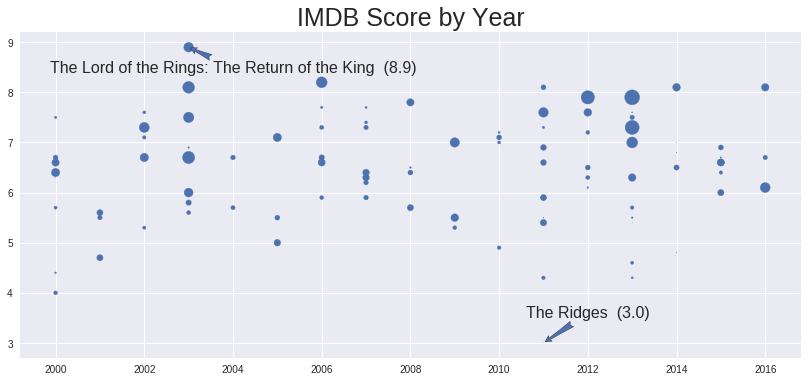

In [0]:
cols = ['budget', 'title_year', 'imdb_score', 'movie_title']
m = movies[cols].dropna()

# m = movie[['budget', 'title_year', 'imdb_score', 'movie_title']].dropna()
m['budget2'] = m['budget'] / 1e6
np.random.seed(0)
movie_samp = m.query('title_year >= 2000').sample(100)

fig, ax = plt.subplots(figsize=(14,6))
ax.scatter(x='title_year', y='imdb_score', s='budget2', data=movie_samp)

idx_min = movie_samp['imdb_score'].idxmin()
idx_max = movie_samp['imdb_score'].idxmax()
for idx, offset in zip([idx_min, idx_max], [.5, -.5]):
    year = movie_samp.loc[idx, 'title_year']
    score = movie_samp.loc[idx, 'imdb_score']
    title = movie_samp.loc[idx, 'movie_title']
    ax.annotate(xy=(year, score), 
                xytext=(year + 1, score + offset), 
                s=title + ' ({})'.format(score),
                ha='center',
                size=16,
                arrowprops=dict(arrowstyle="fancy"))
ax.set_title('IMDB Score by Year', size=25)
ax.grid(True)

### Serie temporales

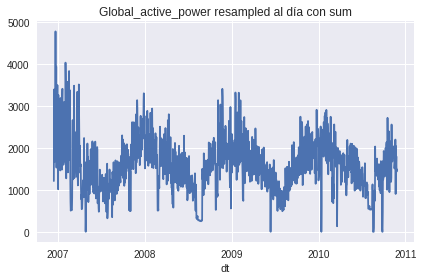

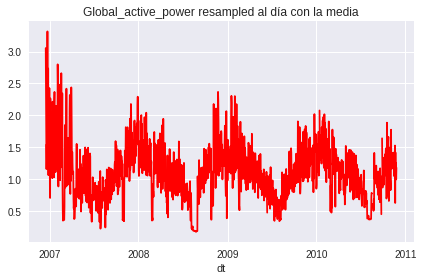

In [7]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#Re-muestreo por día
#Ver documentación oficial: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html

df.Global_active_power.resample('D').sum().plot(title='Global_active_power resampled al día con sum') 
plt.tight_layout()
plt.show()   

df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled al día con la media', color='red') 
plt.tight_layout()
plt.show()

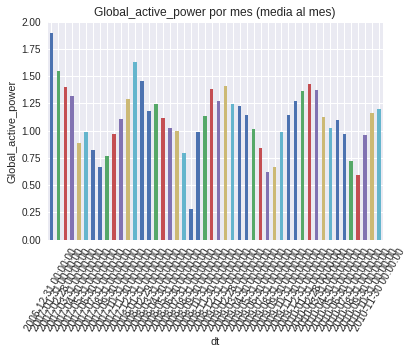

In [8]:
#Re-muestreo por mes

df['Global_active_power'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power por mes (media al mes)')
plt.show()

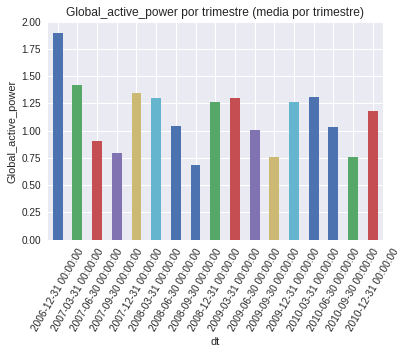

In [9]:
#Re-muestreo trimestral

df['Global_active_power'].resample('Q').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power por trimestre (media por trimestre)')
plt.show()

###Meetups en  Houston

In [10]:
meetup = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/meetup_groups.csv', 
                     parse_dates=['join_date'], 
                     index_col='join_date')
meetup.head()

,group,city,state,country
join_date,,,,
2016-11-18 02:41:29,houston machine learning,Houston,TX,us
2017-05-09 14:16:37,houston machine learning,Houston,TX,us
2016-12-30 02:34:16,houston machine learning,Houston,TX,us
2016-07-18 00:48:17,houston machine learning,Houston,TX,us
2017-05-25 12:58:16,houston machine learning,Houston,TX,us


In [11]:
#Re-muestreo por semana y grupo
group_count = meetup.groupby([pd.Grouper(freq='W'), 'group']).size()
group_count.head()

join_date   group   
2010-11-07  houstonr     5
2010-11-14  houstonr    11
2010-11-21  houstonr     2
2010-12-05  houstonr     1
2011-01-16  houstonr     2
dtype: int64

In [12]:
gc2 = group_count.unstack('group', fill_value=0)
gc2.tail()
group_total = gc2.cumsum()
group_total.tail()
row_total = group_total.sum(axis='columns')
group_cum_pct = group_total.div(row_total, axis='index')
group_cum_pct.tail()

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2017-09-17,0.282058,0.228862,0.252713,0.094868,0.141498
2017-09-24,0.282409,0.227629,0.252892,0.095732,0.141338
2017-10-01,0.283074,0.226829,0.251914,0.097703,0.140481
2017-10-08,0.284177,0.226712,0.251640,0.097612,0.139858
2017-10-15,0.284187,0.226959,0.251206,0.098423,0.139226


Text(0.86, 0.78, 'Machine Learning')

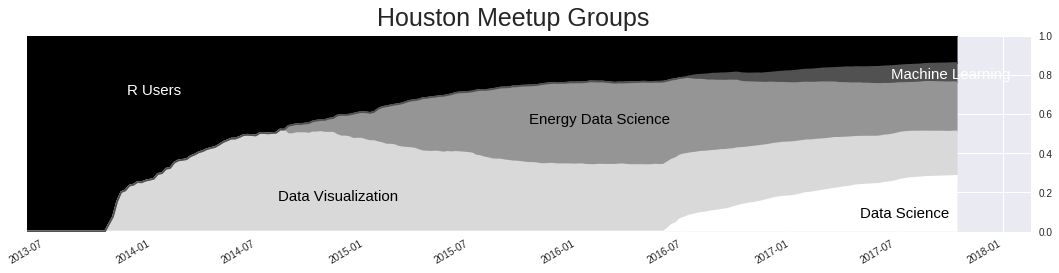

In [13]:
#Diagrama por áreas

ax = group_cum_pct.plot(kind='area', figsize=(18,4),
                        cmap='Greys', xlim=('2013-6', None), 
                        ylim=(0, 1), legend=False)
ax.figure.suptitle('Houston Meetup Groups', size=25)
ax.set_xlabel('')
ax.yaxis.tick_right()

plot_kwargs = dict(xycoords='axes fraction', size=15)
ax.annotate(xy=(.1, .7), s='R Users', color='w', **plot_kwargs)
ax.annotate(xy=(.25, .16), s='Data Visualization', color='k', **plot_kwargs)
ax.annotate(xy=(.5, .55), s='Energy Data Science', color='k', **plot_kwargs)
ax.annotate(xy=(.83, .07), s='Data Science', color='k', **plot_kwargs)
ax.annotate(xy=(.86, .78), s='Machine Learning', color='w', **plot_kwargs)

In [14]:
#Diagrama de tipo "quesitos"

pie_data = group_cum_pct.asfreq('3MS', method='bfill').tail(6).to_period('M').T
pie_data

join_date,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09
group,,,,,,
houston data science,0.016949,0.110375,0.171245,0.212289,0.244033,0.280162
houston data visualization,0.337827,0.306052,0.277244,0.261103,0.242085,0.230332
houston energy data science,0.416025,0.354467,0.312271,0.288859,0.267576,0.253758
houston machine learning,0.000000,0.037176,0.051969,0.071593,0.087839,0.093026
houstonr,0.229199,0.191931,0.187271,0.166156,0.158467,0.142722


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


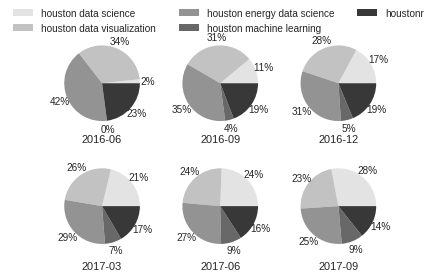

In [15]:
from matplotlib.cm import Greys
greys = Greys(np.arange(50,250,40))

ax_array = pie_data.plot(kind='pie', subplots=True, 
                         layout=(2,3), labels=None,
                         autopct='%1.0f%%', pctdistance=1.22,
                         colors=greys)
ax1 = ax_array[0, 0]
ax1.figure.legend(ax1.patches, pie_data.index, ncol=3)
for ax in ax_array.flatten():
    ax.xaxis.label.set_visible(True)
    ax.set_xlabel(ax.get_ylabel())
    ax.set_ylabel('')
ax1.figure.subplots_adjust(hspace=.3)

###Ejemplos con Seaborn

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


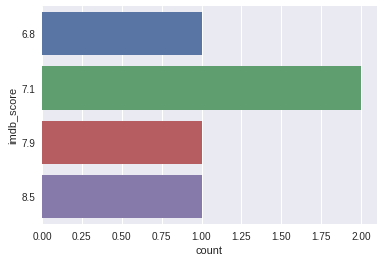

In [0]:
#Mostrar las películas por imdb score (sólo las de head).

import seaborn as sns
sns.countplot(y='imdb_score', data=movies.head())
#sns.countplot(y='imdb_score', data=movies)

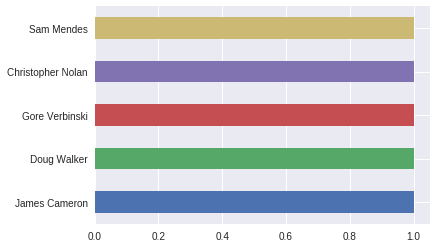

In [0]:
#Mostrar las películas por director (sólo las de head).

movies['director_name'].head().value_counts().plot('barh')

Text(0, 0.5, 'Media IMDB Score por Director')

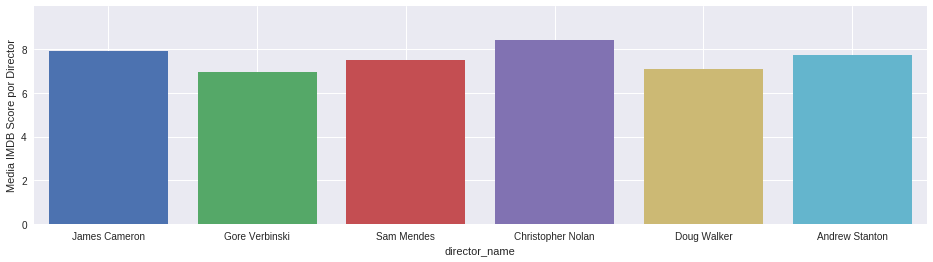

In [0]:
#Mostrar la media de imdb por score de las películas por director.

avg_imdb = movies.groupby('director_name', sort=False)['imdb_score'].mean()
ax = avg_imdb.plot(kind='bar', rot=0, figsize=(16,4), width=.8)
ax.set_xlim(-.5, 5.5)
ax.set_ylabel('Media IMDB Score por Director')

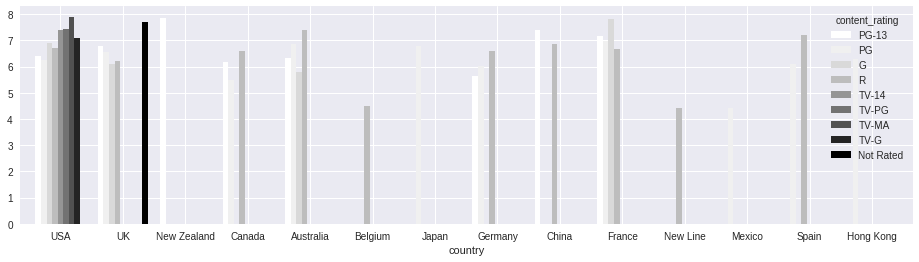

In [0]:
movies.head(1000).groupby(['country', 'content_rating'], sort=False)['imdb_score'] \
        .mean().unstack('content_rating') \
        .plot(kind='bar', figsize=(16,4), rot=0,
              width=.8, cmap='Greys')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


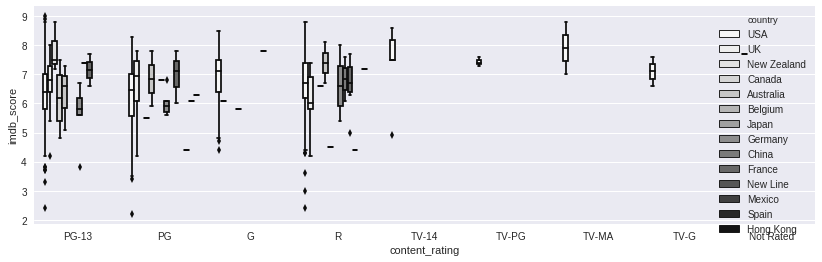

In [0]:
ax = sns.boxplot(x='content_rating', y='imdb_score', data=movies.head(1000), hue='country', palette='Greys')
ax.figure.set_size_inches(14,4)

####Multivariante

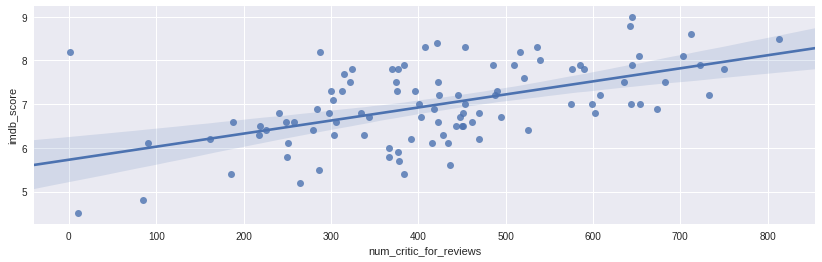

In [0]:
#Diagrama de dispersión: scatter entre el número de reviews y el imdb score.

ax = sns.regplot(x='num_critic_for_reviews', y='imdb_score', data=movies.head(100))
ax.figure.set_size_inches(14,4)

seaborn.axisgrid.FacetGrid

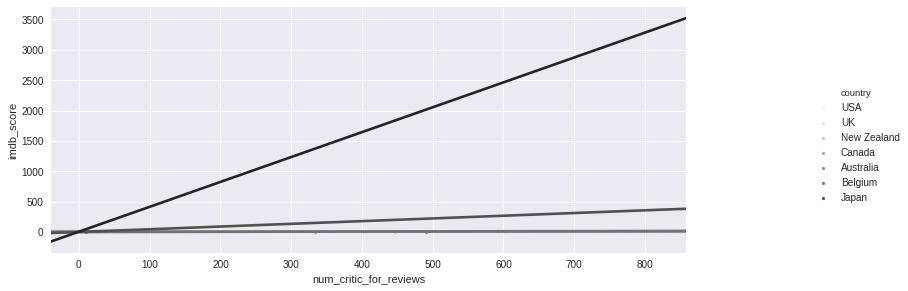

In [0]:
#Diagrama de dispersión: scatter entre el número de reviews y el imdb score.

grid = sns.lmplot(x='num_critic_for_reviews', y='imdb_score',
                  hue='country', palette='Greys',
                  scatter_kws={'s':10}, data=movies.head(100))
grid.fig.set_size_inches(14, 4)
type(grid)

###Paradoja de Simpson (no incluido)

"La paradoja de Simpson o efecto Yule-Simpson es una paradoja en la cual una tendencia que aparece en varios grupos de datos desaparece cuando estos grupos se combinan y en su lugar aparece la tendencia contraria para los datos agregados.""

In [0]:
pd.DataFrame(index=['Student A', 'Student B'], 
             data={'Raw Score': ['50/100', '80/100'], 
                   'Percent Correct':[50,80]}, columns=['Raw Score', 'Percent Correct'])

,Raw Score,Percent Correct
Student A,50/100,50
Student B,80/100,80


In [0]:
pd.DataFrame(index=['Student A', 'Student B'], 
             data={'Difficult': ['45/95', '2/5'], 
                   'Easy': ['5/5', '78/95'],
                   'Difficult Percent': [47, 40],
                   'Easy Percent' : [100, 82],
                  'Total Percent':[50, 80]}, 
             columns=['Difficult', 'Easy', 'Difficult Percent', 'Easy Percent', 'Total Percent'])

,Difficult,Easy,Difficult Percent,Easy Percent,Total Percent
Student A,45/95,5/5,47,100,50
Student B,2/5,78/95,40,82,80


#Tareas

1. Carga otro dataset, como por ejemplo el Nomenclátor de Asturias y extraer estadísticas.
2. Visualizar valores por concejos.
3. Realizar consultas: concejo más grande, concejo más poblado, etc.

#Referencias

* https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html
* https://github.com/PacktPublishing/Pandas-Cookbook